# Downscaled `tasmax` days above 40°C

This notebook is for exploring downscaled data for values above 40°C. It was designed to work for the zarr outputs from the 4km ERA5-based CMIP6 downscaling effort. 


Initial testing of the downscaled `tasmax` data revealed that data for the following models had values above 40°C:
* CNRM-CM6-1-HR
* E3SM-2-0
* EC-Earth3-Veg
* HadGEM3-GC31-LL
* HadGEM3-GC31-MM
* KACE-1-0-G
* NorESM2-MM
* TaiESM1

No such values were found in the downscaled historical data, which makes sense as, the maximum value found in the WRF-downscaled 4km t2_max data is approximately 34°C. 

This notebook simply downscaled `tasmax` data with days over 40 °C counted and plotted in red.

In [ ]:
import os
import numpy as np
import xarray as xr
from pathlib import Path
from xclim.core.units import convert_units_to
import matplotlib.pyplot as plt
import gc

zarr_dir = os.getenv("ZARR_DIR", "/beegfs/CMIP6/snapdata/cmip6_4km_downscaled/zarr")

In [ ]:
# function to plot hot tasmax values
def plot_hot_tasmax(zarr_store):
    ds = xr.open_zarr(zarr_store)
    tasmax = convert_units_to(ds.tasmax, "degC")

    # Compute the mean tasmax over time
    tasmax_mean = tasmax.mean("time")

    tasmax_hot = tasmax > 40
    tasmax_hot_count = tasmax_hot.sum("time")

    # Prepare values for histogram
    tasmax_hot_values = tasmax.where(tasmax_hot).values.flatten()
    tasmax_hot_values = tasmax_hot_values[~np.isnan(tasmax_hot_values)]

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the mean tasmax as a muted background
    axs[0].imshow(
        tasmax_mean.transpose("y", "x").values,
        cmap="Greys",
        alpha=0.5,
        interpolation="none",
    )

    # Overlay the hot day counts using a red color palette, masking zeros for clarity
    masked_hot = np.ma.masked_where(tasmax_hot_count.T == 0, tasmax_hot_count.T)
    im = axs[0].imshow(masked_hot, cmap="Reds", alpha=0.8, interpolation="none")

    plt.colorbar(im, ax=axs[0], label="Count of Days > 40°C (Red Overlay)")
    axs[0].set_title("Mean tasmax (grey) with Hot Day Counts (> 40°C) Overlay")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")

    # Histogram subplot
    if tasmax_hot_values.size > 0:
        axs[1].hist(tasmax_hot_values, bins=30, color="red", alpha=0.7)
        axs[1].set_xlabel("tasmax (°C)")
        axs[1].set_ylabel("Frequency")
        axs[1].set_title("Histogram of tasmax Values Where tasmax > 40°C")
    else:
        axs[1].text(
            0.5,
            0.5,
            "No tasmax values above 40°C found.",
            ha="center",
            va="center",
            fontsize=12,
        )
        axs[1].set_axis_off()

    plt.tight_layout()
    plt.show()

    del ds
    del tasmax

    gc.collect()

### CNRM-CM6-1-HR

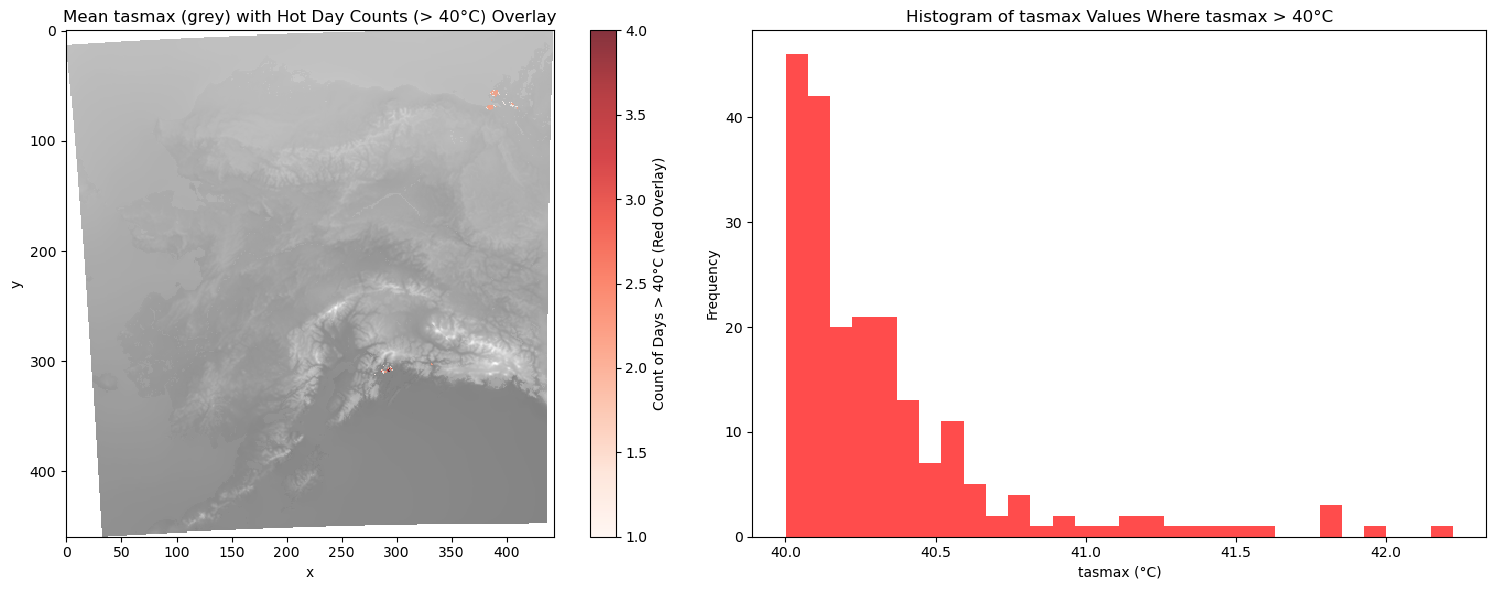

In [10]:
model = "CNRM-CM6-1-HR"
scenario = "ssp585"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

### E3SM-2-0

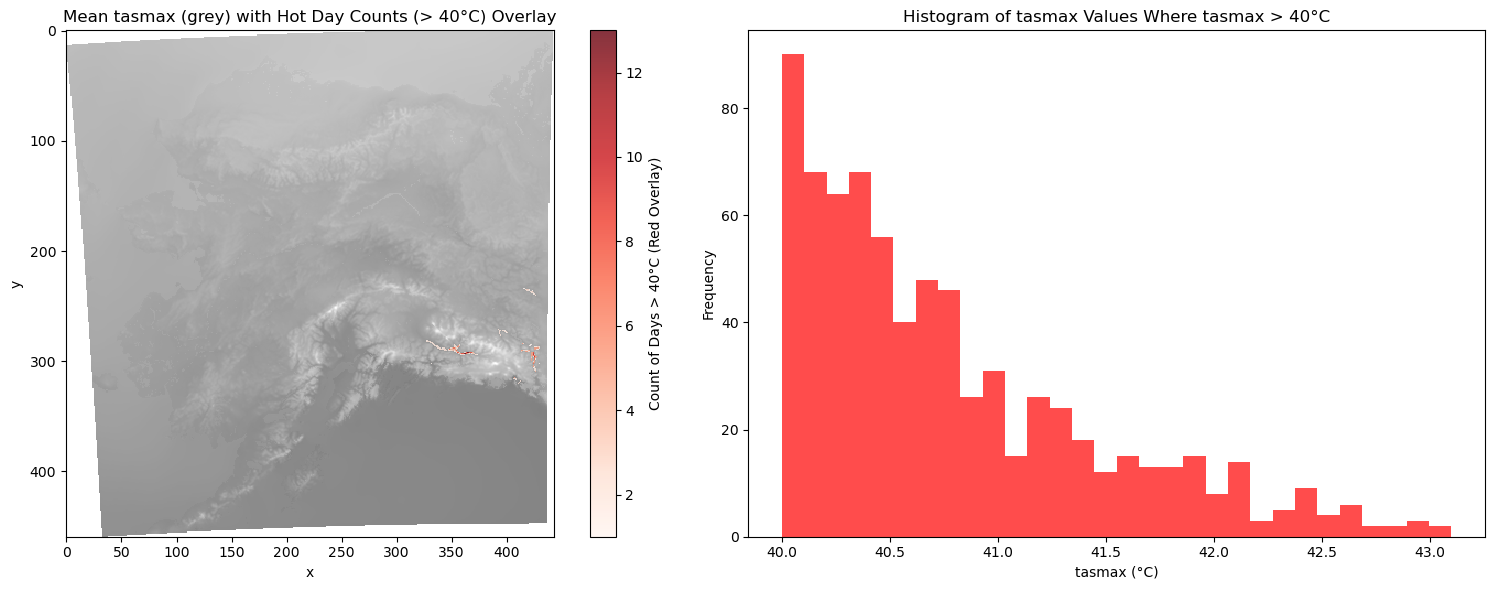

In [11]:
model = "E3SM-2-0"
scenario = "ssp370"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

### EC-Earth3-Veg

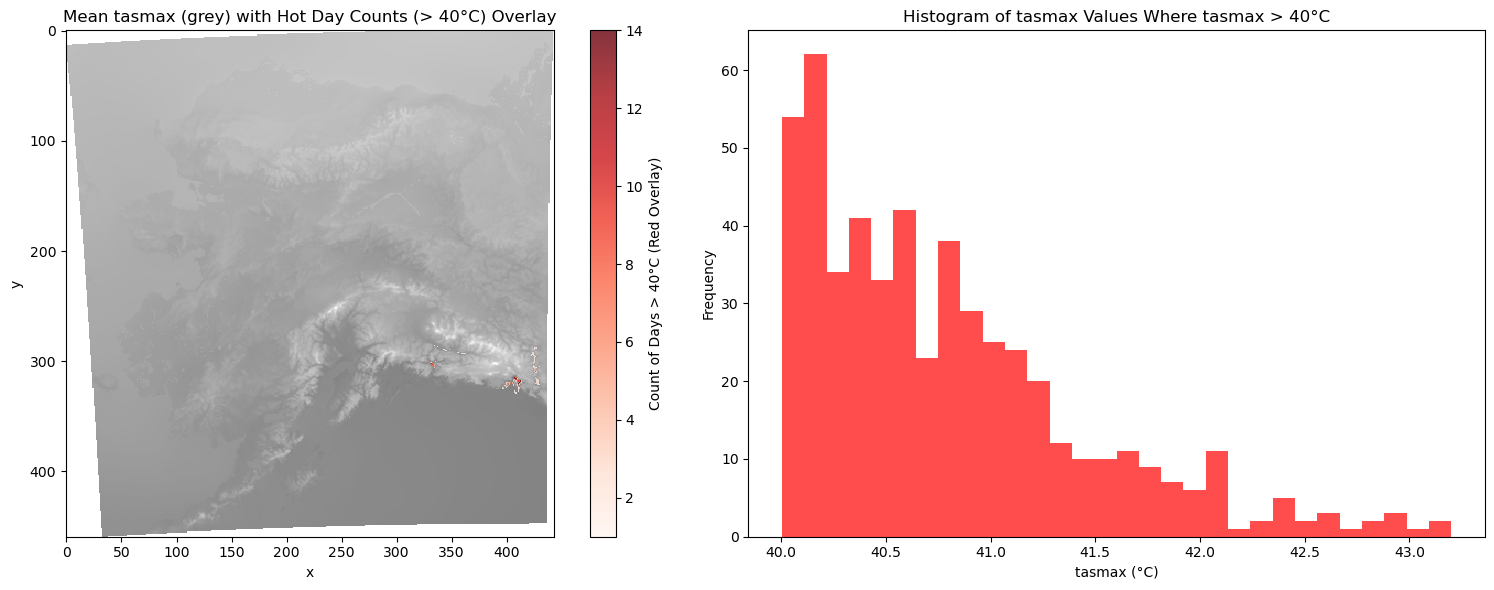

In [14]:
model = "EC-Earth3-Veg"
scenario = "ssp370"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

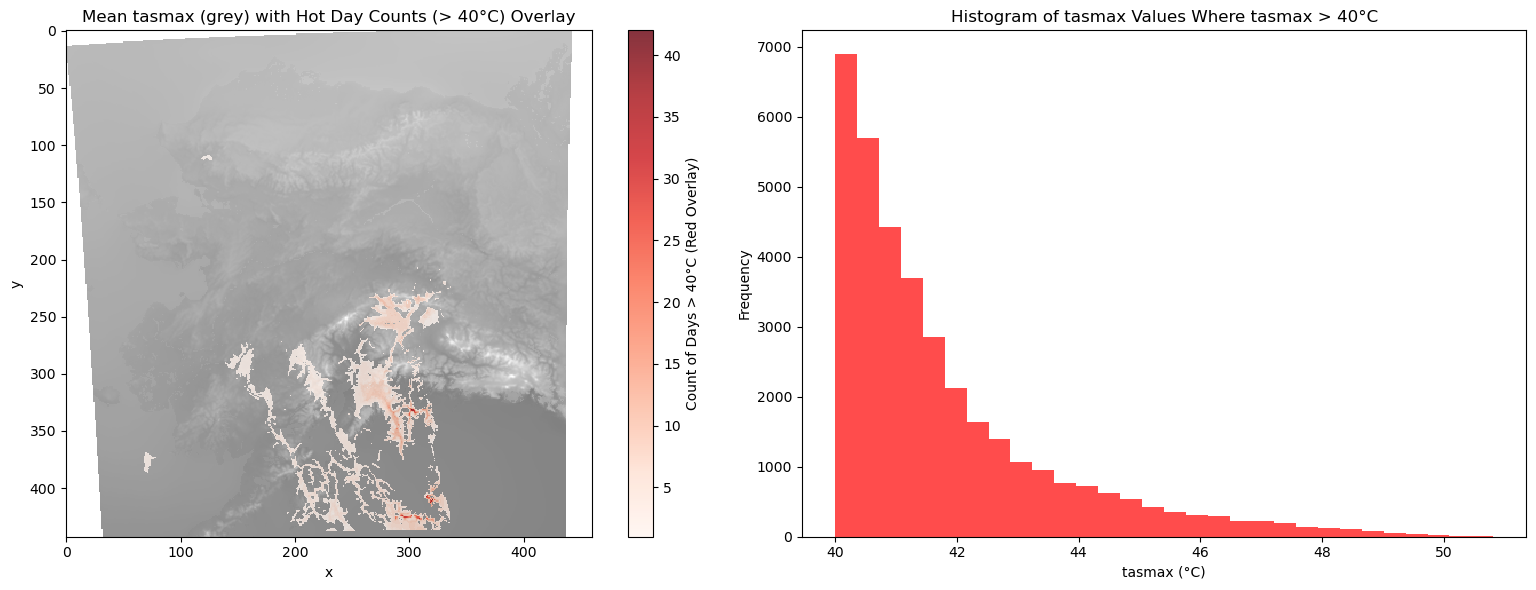

In [13]:
model = "EC-Earth3-Veg"
scenario = "ssp585"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

### HadGEM3-GC31-LL

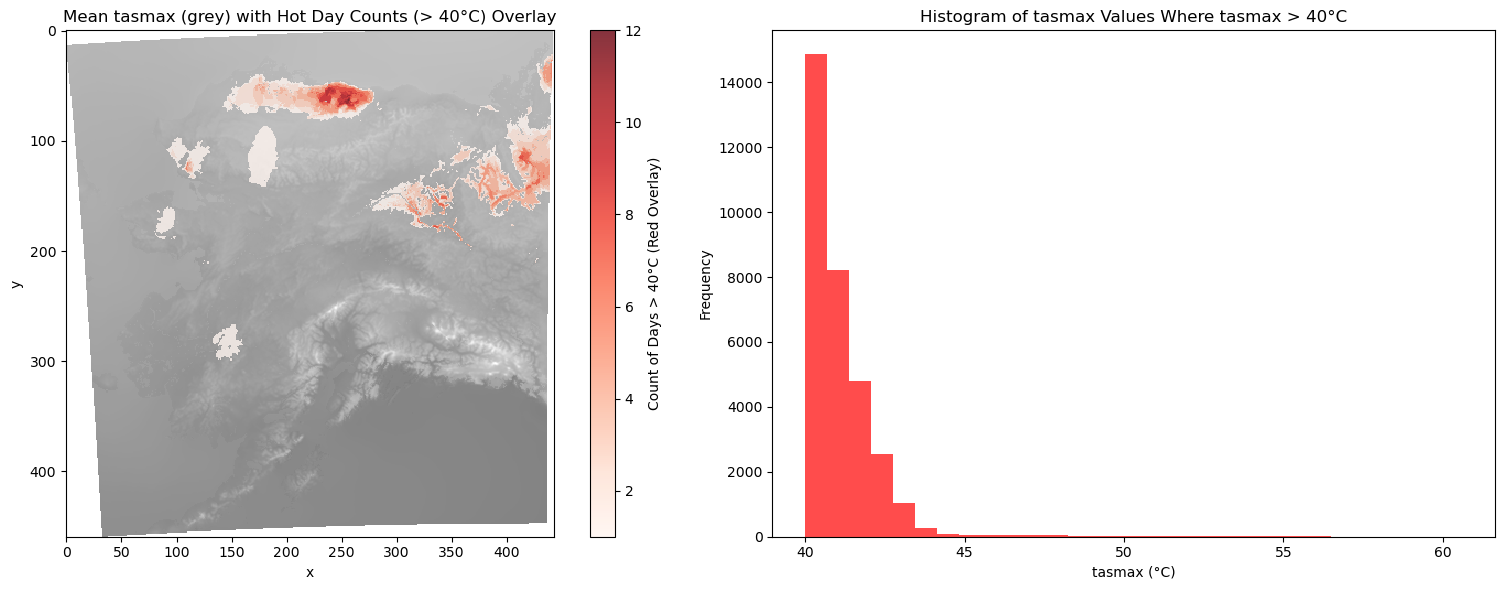

In [15]:
model = "HadGEM3-GC31-LL"
scenario = "ssp245"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

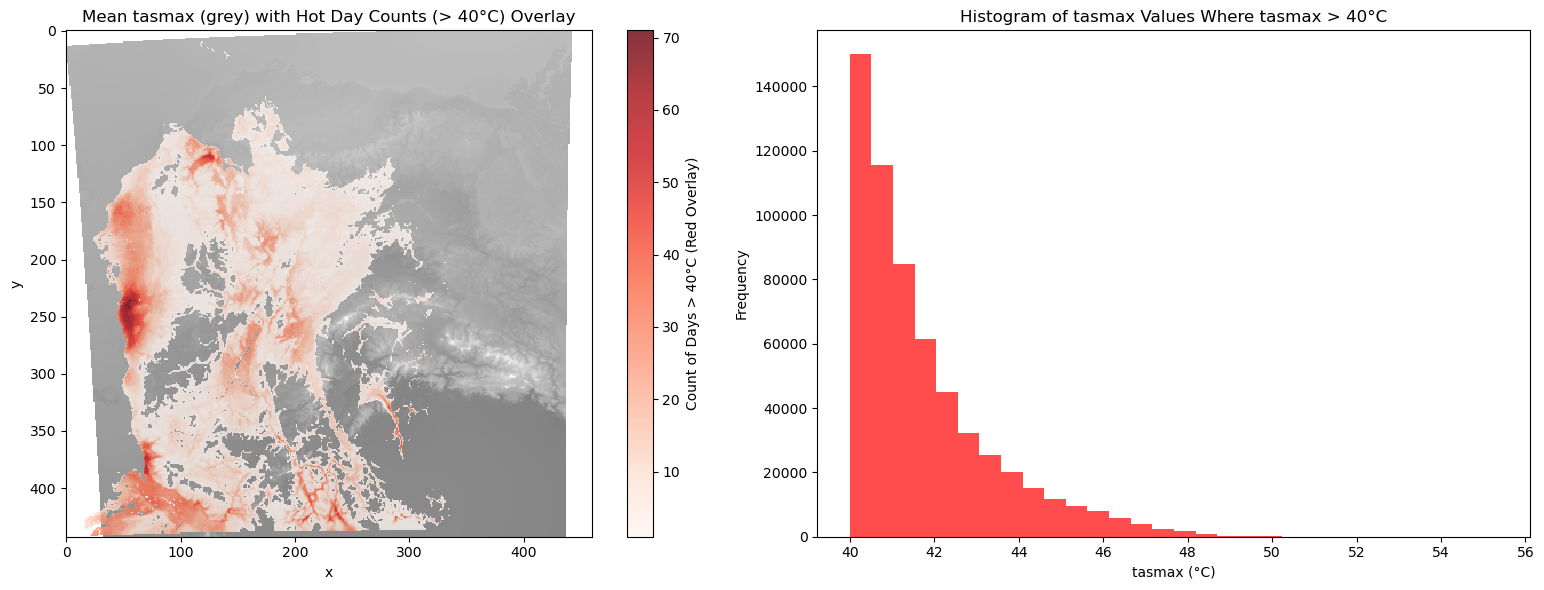

In [16]:
model = "HadGEM3-GC31-LL"
scenario = "ssp585"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

### HadGEM3-GC31-MM

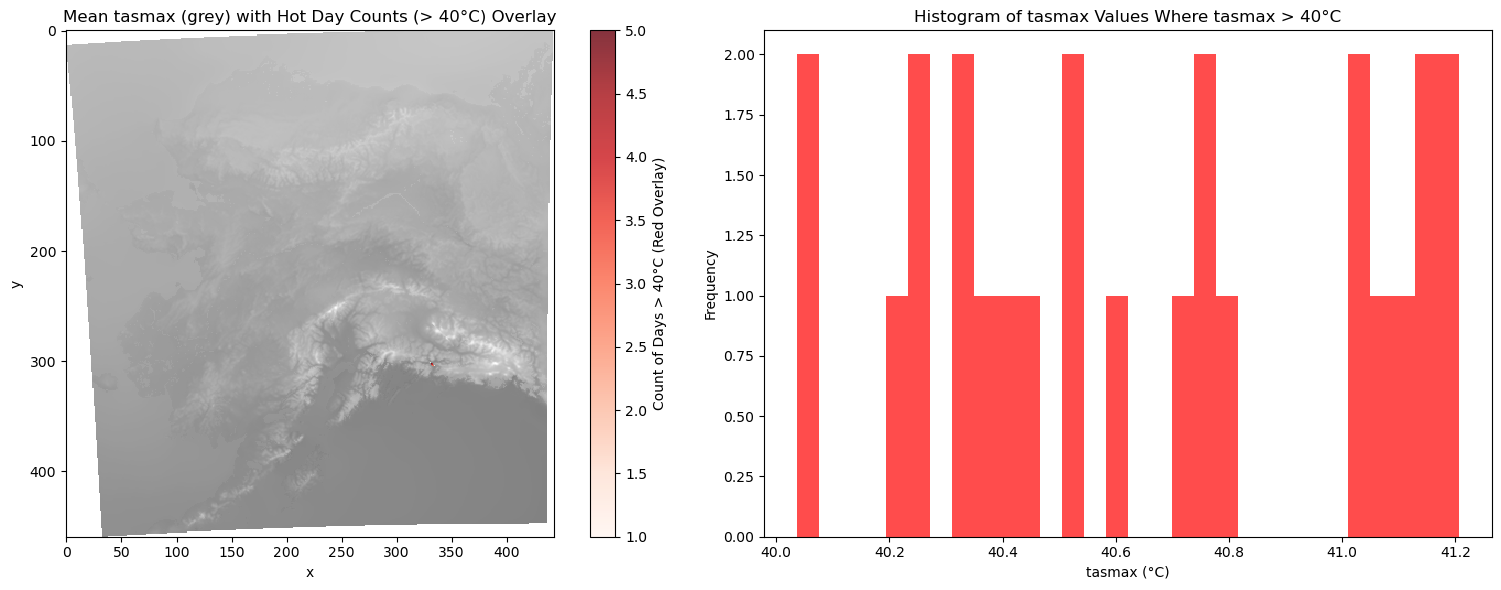

In [17]:
model = "HadGEM3-GC31-MM"
scenario = "ssp126"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

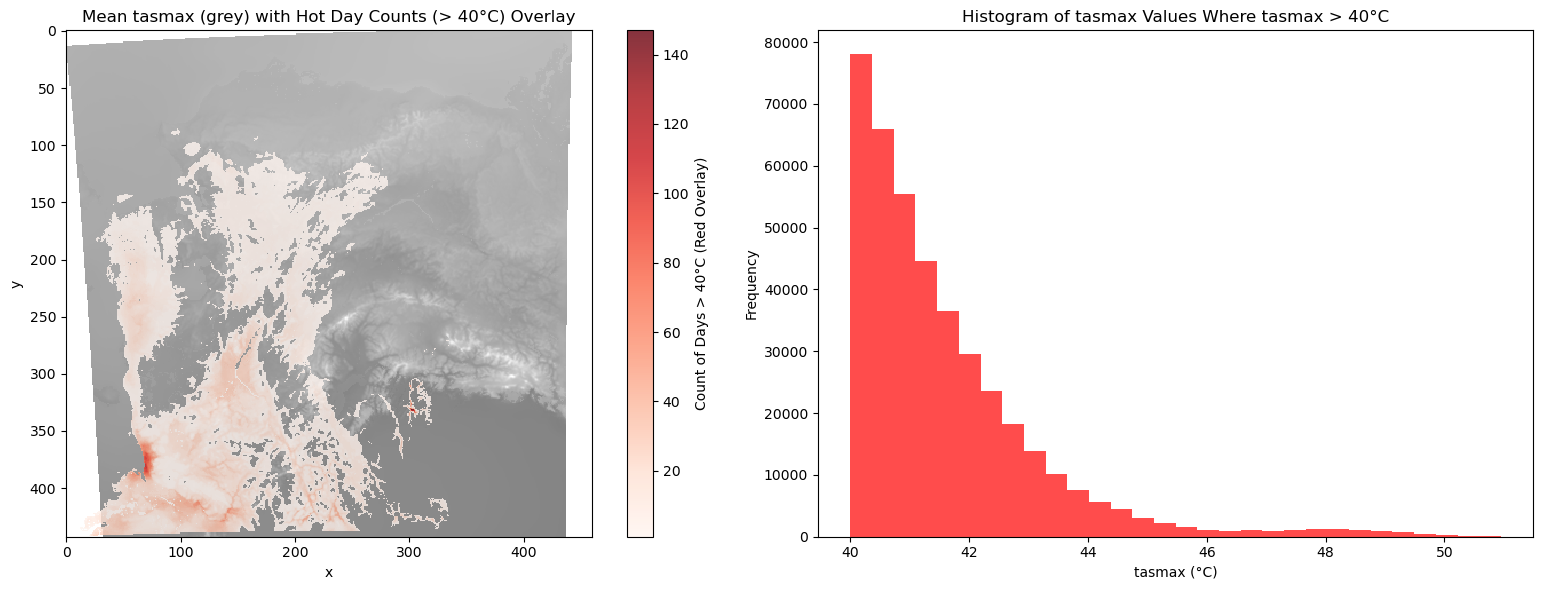

In [18]:
model = "HadGEM3-GC31-MM"
scenario = "ssp585"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

### KACE-1-0-G

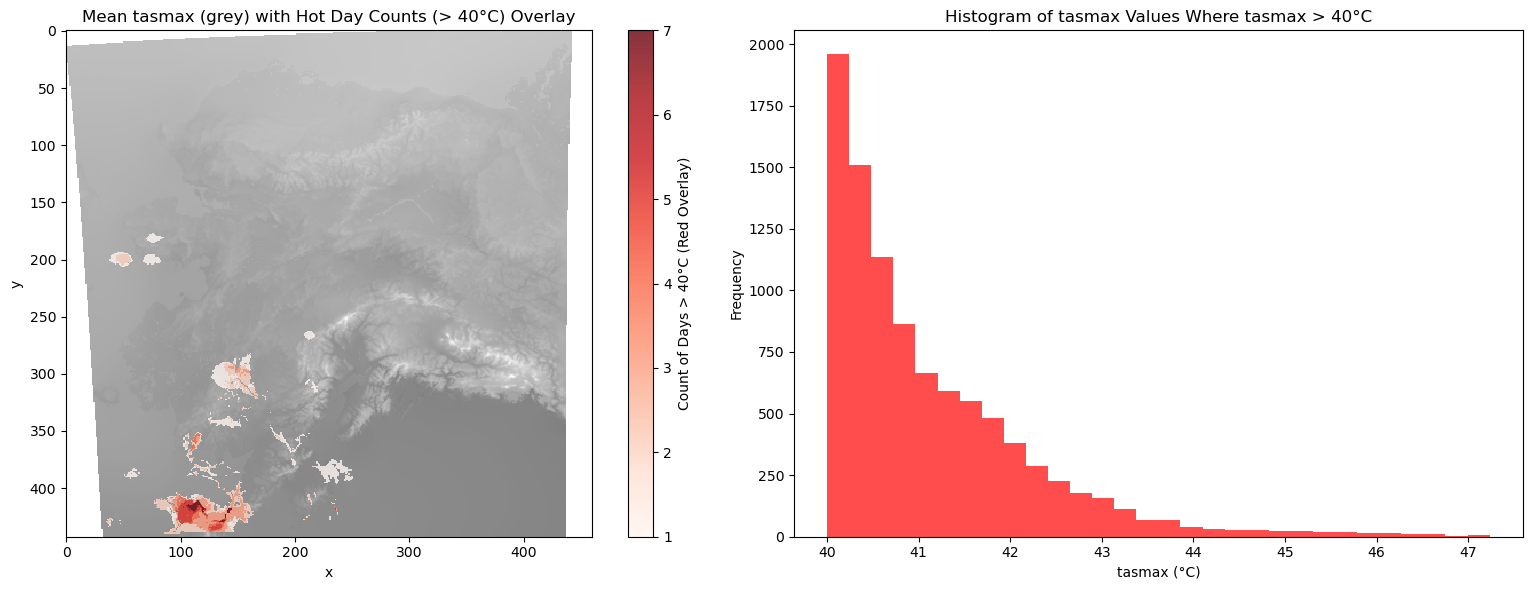

In [19]:
model = "KACE-1-0-G"
scenario = "ssp126"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

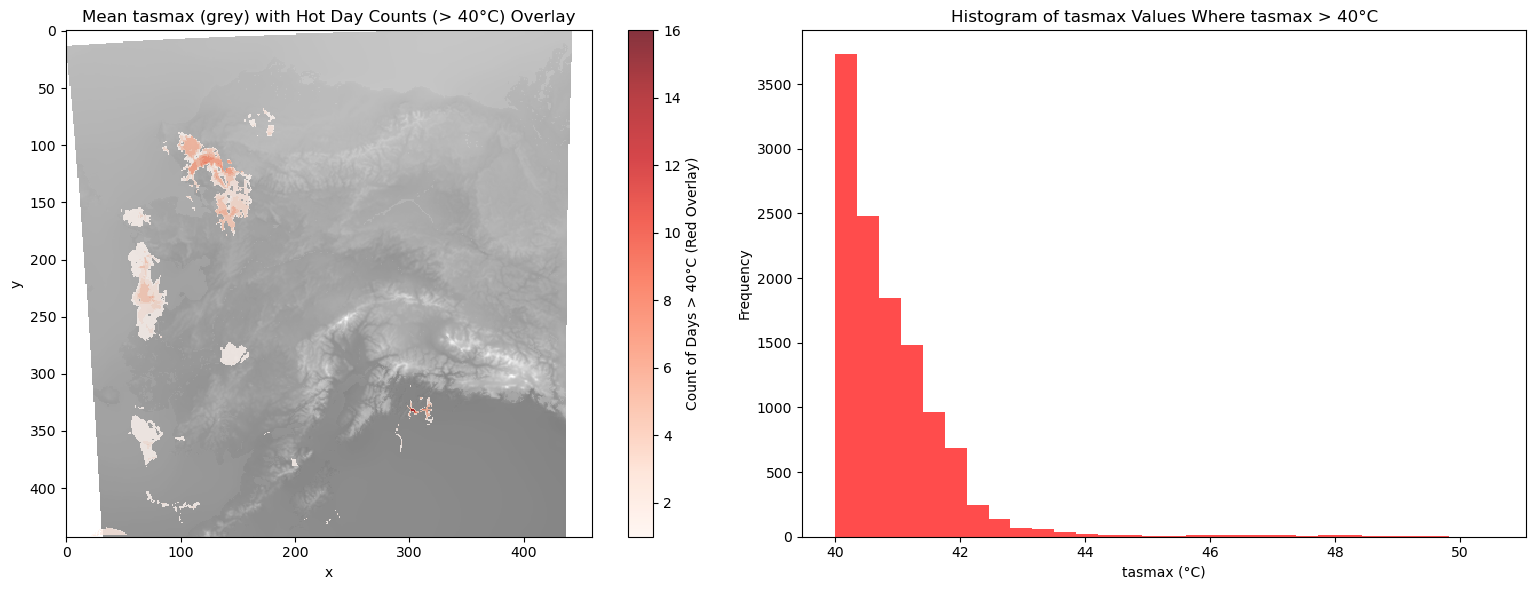

In [20]:
model = "KACE-1-0-G"
scenario = "ssp245"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

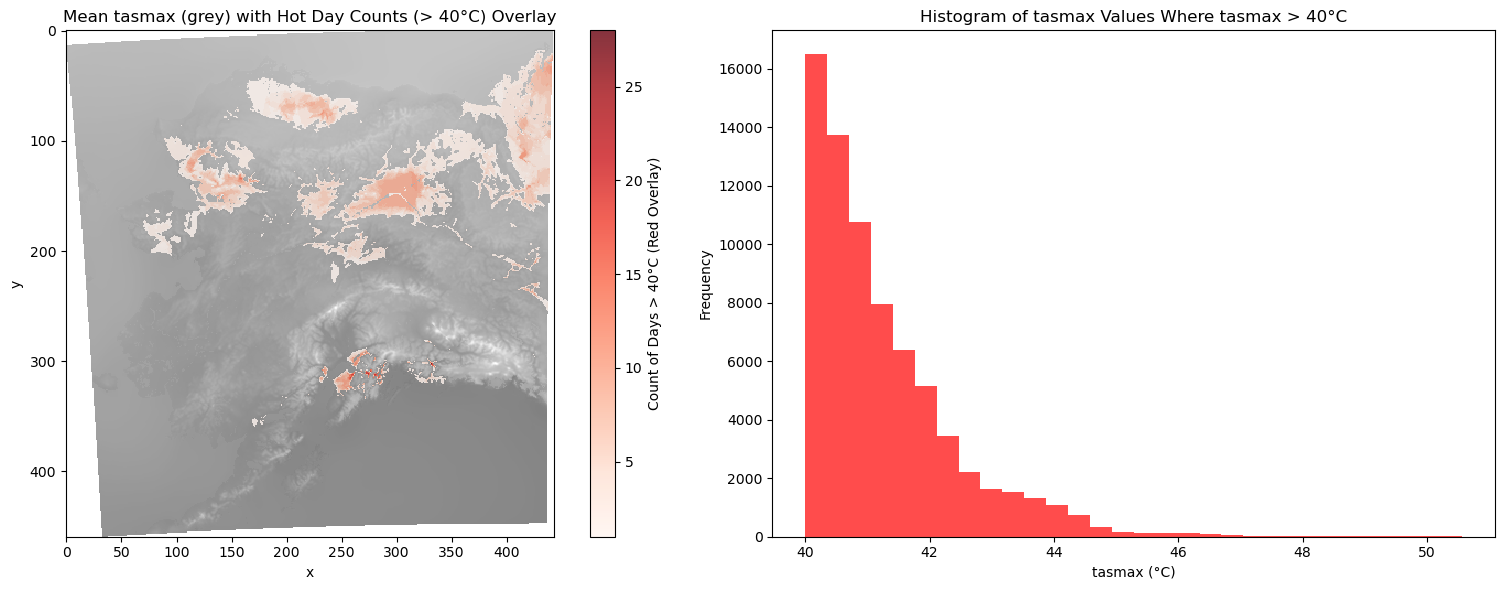

In [21]:
model = "KACE-1-0-G"
scenario = "ssp370"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

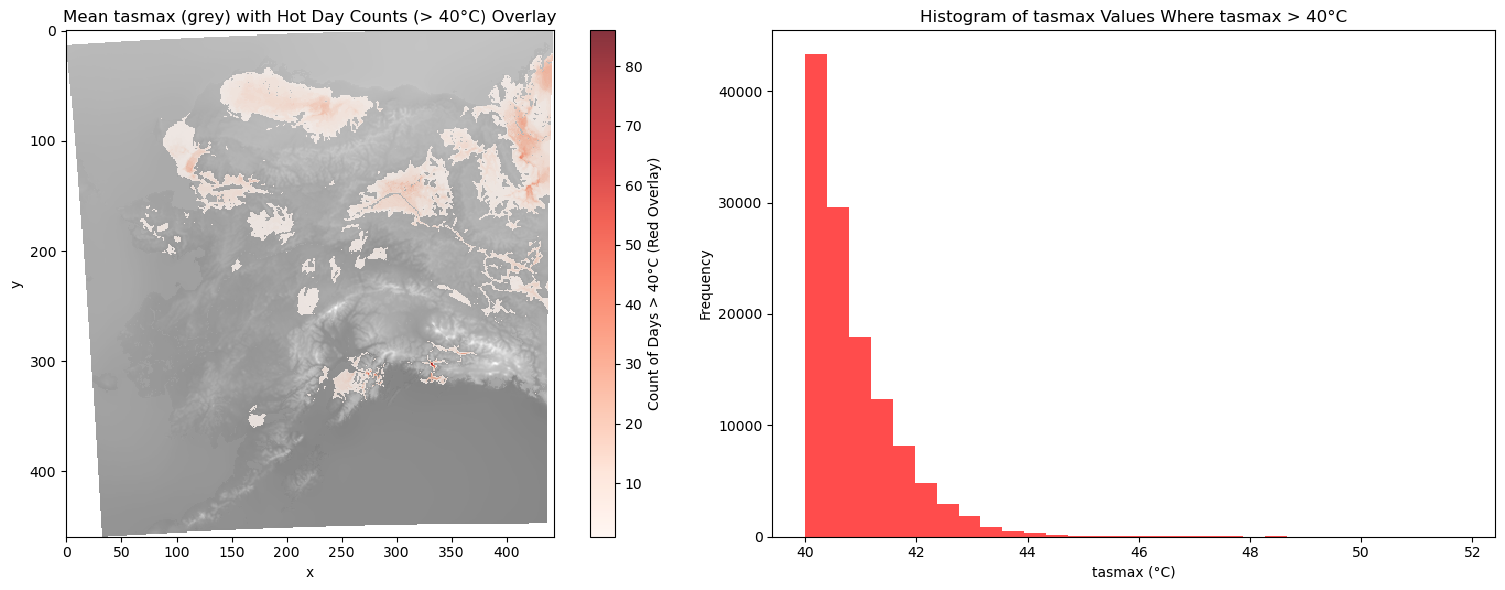

In [22]:
model = "KACE-1-0-G"
scenario = "ssp585"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

### NorESM2-MM

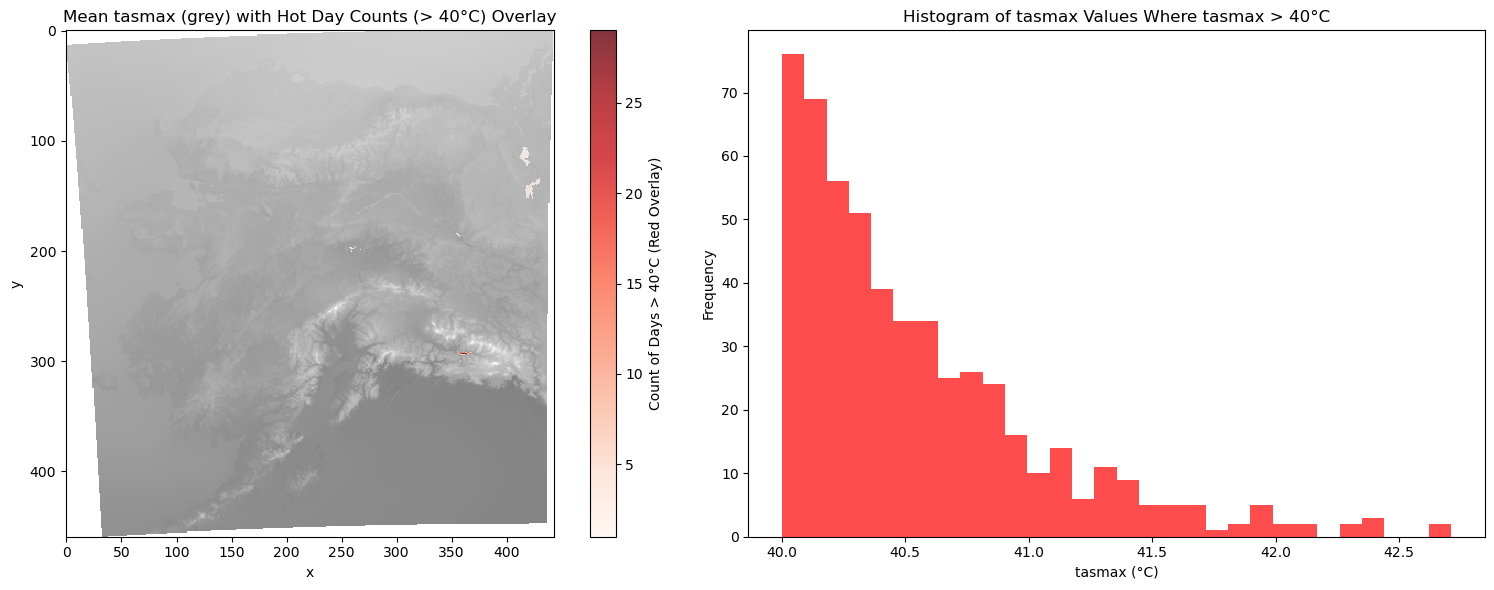

In [23]:
model = "NorESM2-MM"
scenario = "ssp370"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

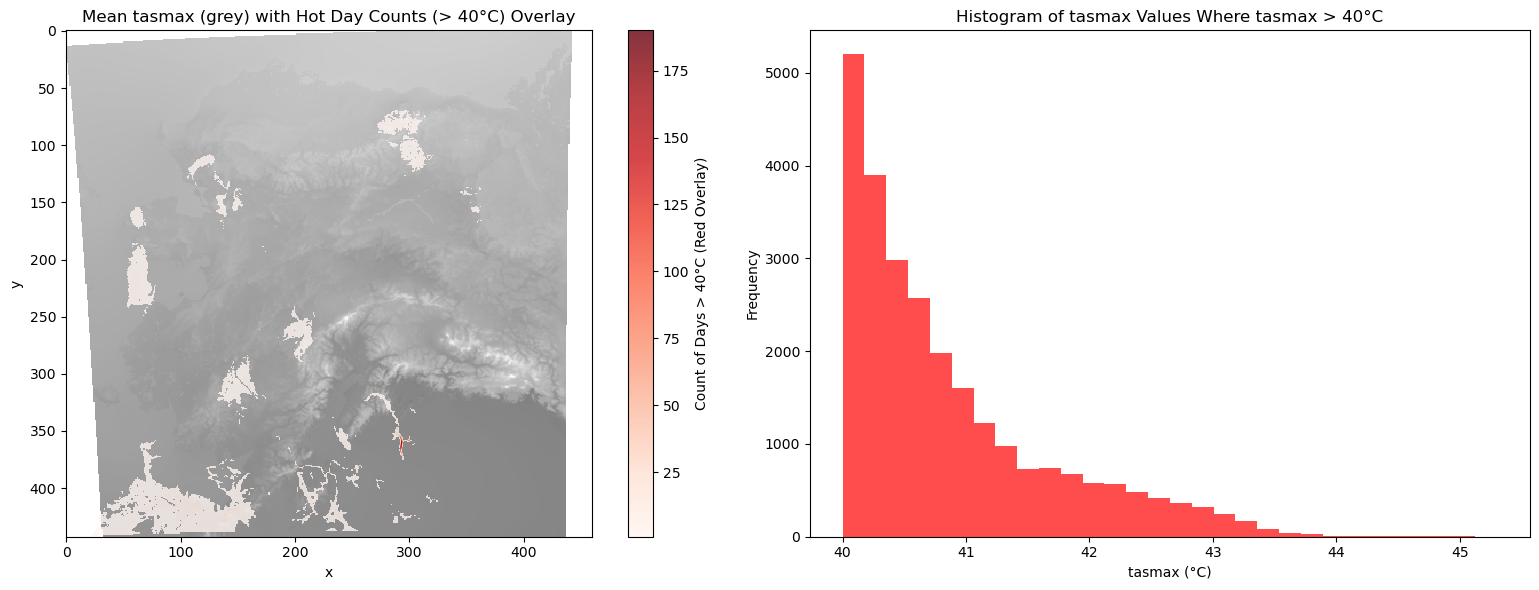

In [24]:
model = "NorESM2-MM"
scenario = "ssp585"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

### TaiESM1

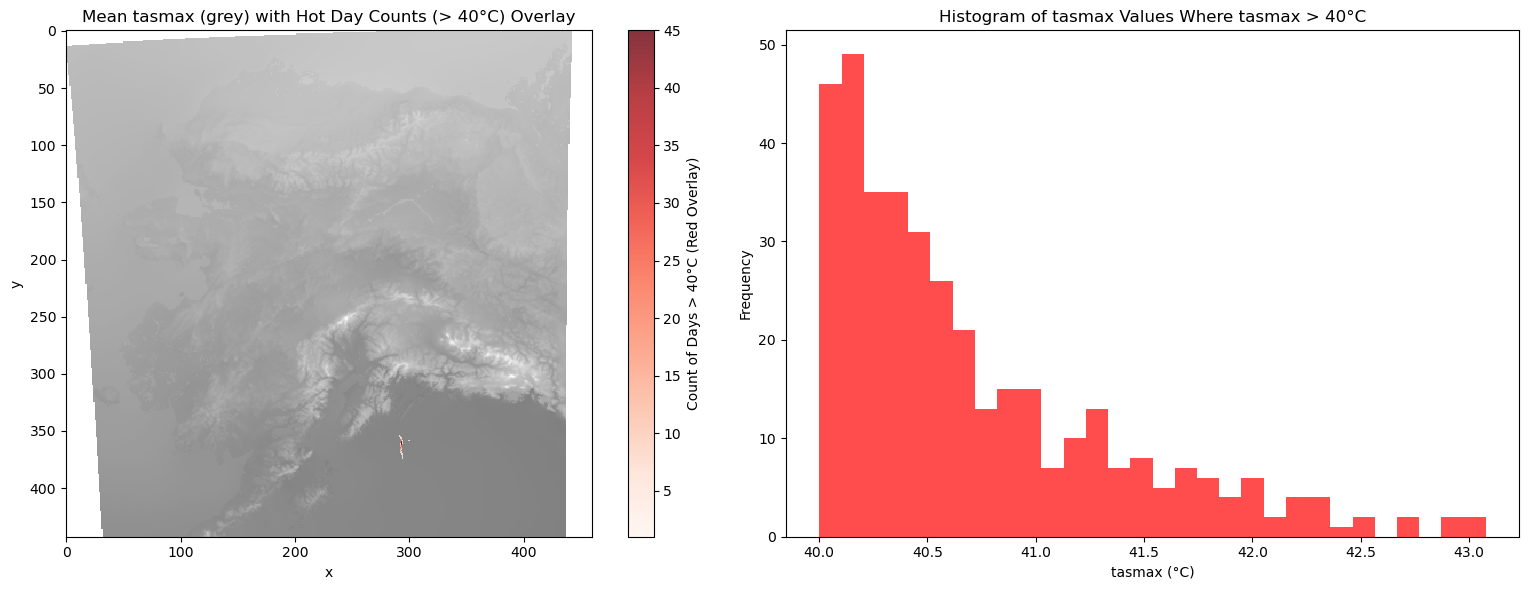

In [25]:
model = "TaiESM1"
scenario = "ssp126"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

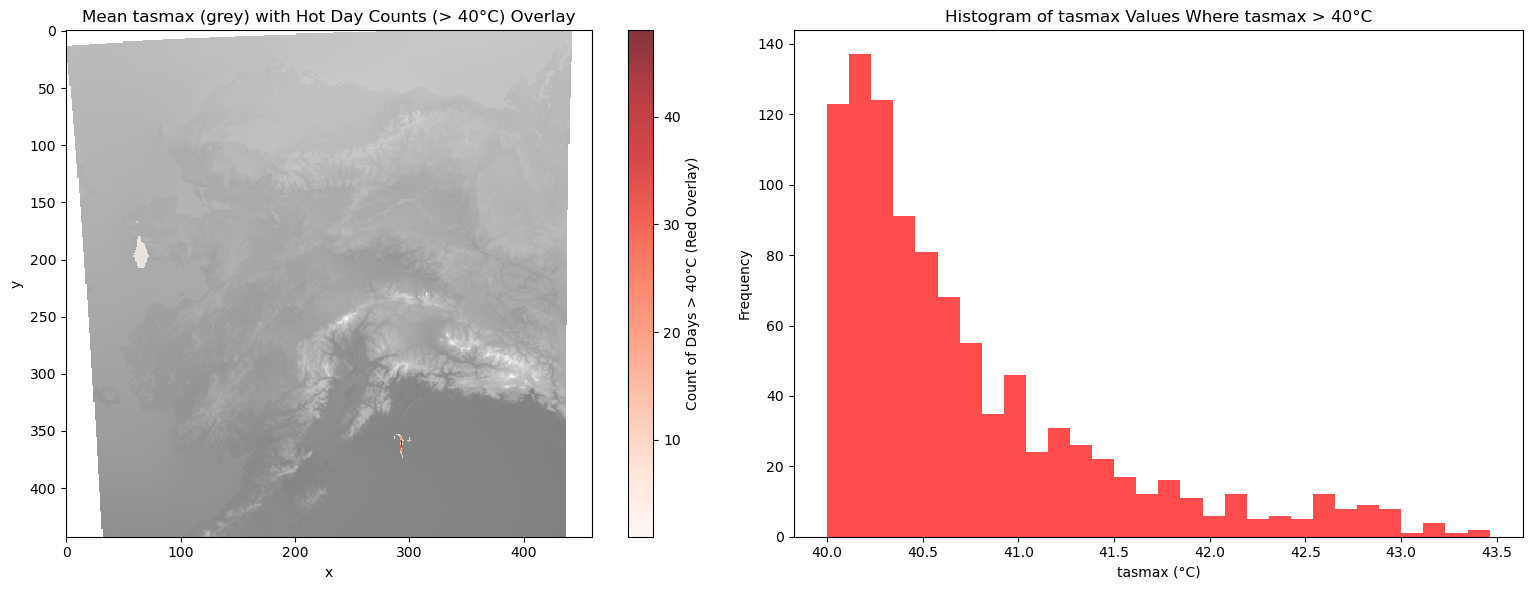

In [26]:
model = "TaiESM1"
scenario = "ssp245"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

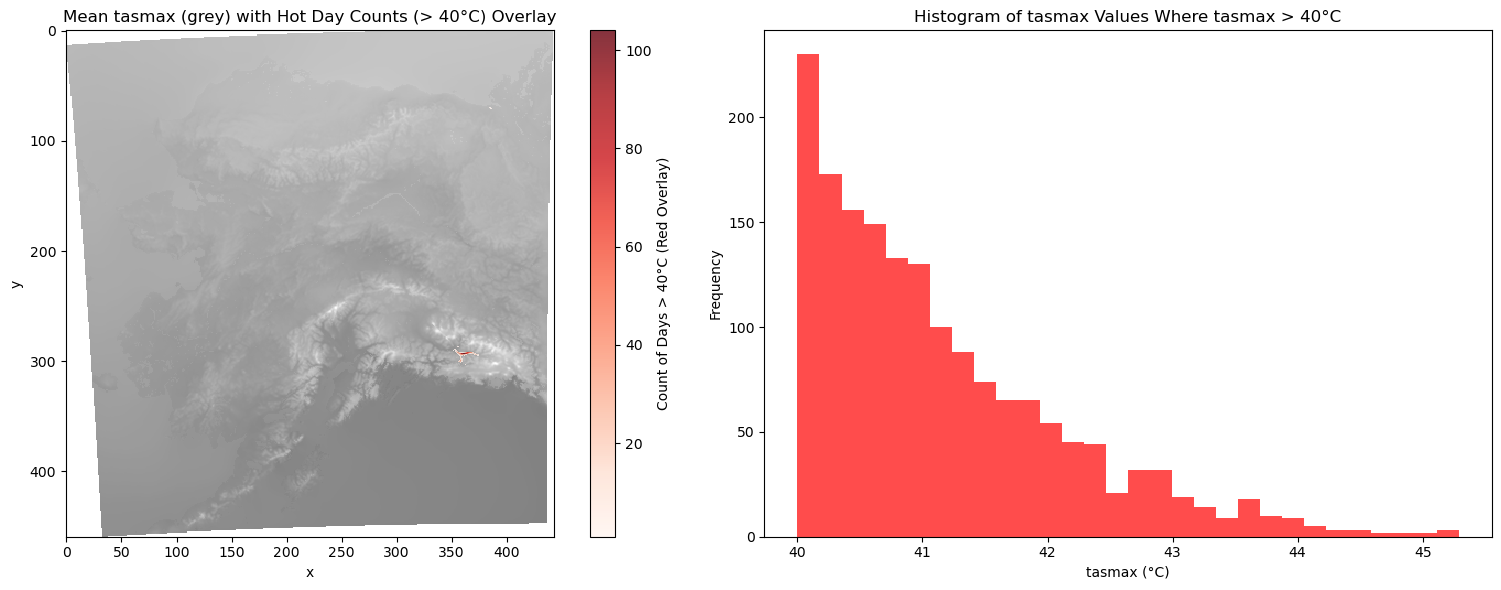

In [27]:
model = "TaiESM1"
scenario = "ssp370"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)

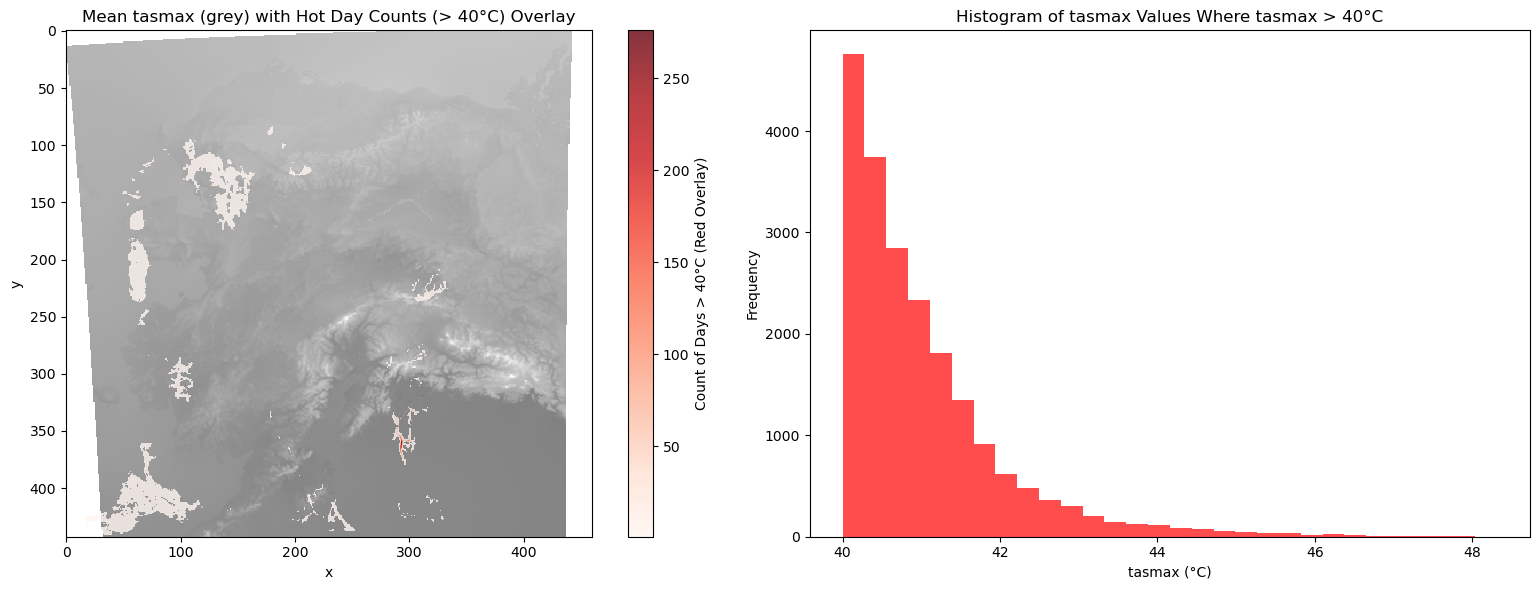

In [28]:
model = "TaiESM1"
scenario = "ssp585"
zarr_store = zarr_dir.joinpath(f"tasmax_{model}_{scenario}_adjusted.zarr")
plot_hot_tasmax(zarr_store)